# PCA (Principal Component Analysis)

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Iris datasets를 통해 PCA를 수행

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
# 표준 스케일러로 정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_std = scaler.fit_transform(iris.data)

## numpy로 구하기

In [6]:
# 공분산 행렬 구하기
iris_cov = np.dot(iris_std.T,iris_std) / len(iris_std)
iris_cov

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [7]:
np.cov(iris_std.T)

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [8]:
np.dot(iris_std.T,iris_std) / (len(iris_std)-1)

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [11]:
#고유벡터, 고유값구하기
eig_vals, eig_vegs = np.linalg.eig(iris_cov)
eig_vals

array([2.91849782, 0.91403047, 0.14675688, 0.02071484])

In [12]:
eig_vegs

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [26]:
# 주성분 PC1
PC1 = np.dot(iris_std, eig_vegs.T[0].reshape(-1,1))
PC1[:5]

array([[-2.26470281],
       [-2.08096115],
       [-2.36422905],
       [-2.29938422],
       [-2.38984217]])

In [27]:
# 주성분 PC2
PC2 = np.dot(iris_std, eig_vegs.T[1].reshape(-1,1))
PC2[:5]

array([[-0.4800266 ],
       [ 0.67413356],
       [ 0.34190802],
       [ 0.59739451],
       [-0.64683538]])

In [28]:
iris_PCA = pd.DataFrame({'PC1':PC1.reshape(-1),'PC2':PC2.reshape(-1), 'species':iris.target})
iris_PCA

,PC1,PC2,species
0,-2.264703,-0.480027,0
1,-2.080961,0.674134,0
2,-2.364229,0.341908,0
3,-2.299384,0.597395,0
4,-2.389842,-0.646835,0
...,...,...,...
145,1.870503,-0.386966,2
146,1.564580,0.896687,2
147,1.521170,-0.269069,2
148,1.372788,-1.011254,2


## sklearn 으로 구하기

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [31]:
#fit() 와 trnasform()을 호출하여 PCA변환 데이터 반환
pca.fit(iris_std)
iris_pca = pca.transform(iris_std)
print(iris_pca.shape)


(150, 2)


In [33]:
iris_pca[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

## 데이터 시각화

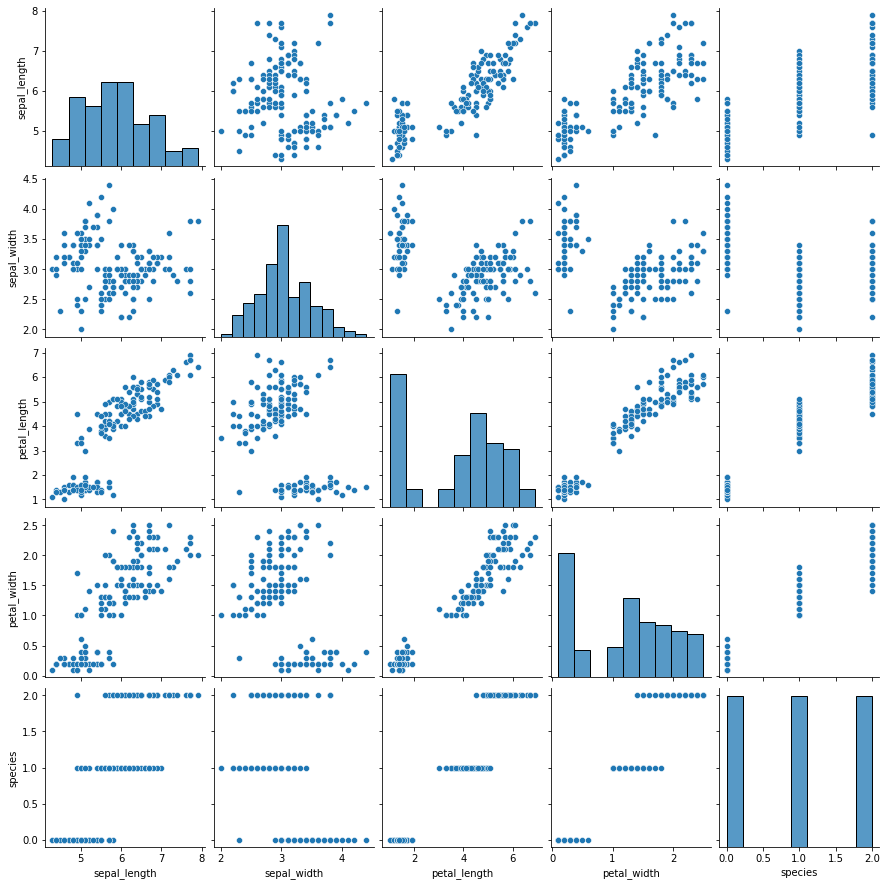

In [41]:
columns = ['sepal_length','sepal_width','petal_length','petal_width']
iris_df = pd.DataFrame(iris.data , columns=columns)
iris_df['species']=iris.target
sns.pairplot(iris_df);

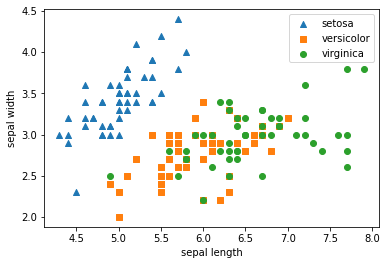

In [42]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot 
for i, marker in enumerate(markers):
    x_axis_data = iris_df[iris_df['species']==i]['sepal_length']
    y_axis_data = iris_df[iris_df['species']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

## PCA 변환후 시각화

In [44]:
iris_pca_df = pd.DataFrame(data=iris_pca,columns=['PC1','PC2'])
iris_pca_df['species'] = iris.target
iris_pca_df.sample(3)

,PC1,PC2,species
46,-2.384733,1.120430,0
61,0.440693,-0.063295,1
84,0.223979,-0.287774,1


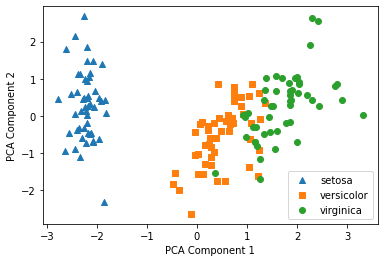

In [47]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot 
for i, marker in enumerate(markers):
    x_axis_data = iris_pca_df[iris_pca_df['species']==i]['PC1']
    y_axis_data = iris_pca_df[iris_pca_df['species']==i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [48]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify=iris.target, test_size=0.3, random_state=2021
)

## 차원축소전 데이터로 분류

In [53]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
pred = dtc.predict(X_test)
accuracy_score(y_test,pred)

0.9111111111111111

## 차원축소후 데이터로 분류

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_pca_df[['PC1','PC2']], iris.target, stratify=iris.target, test_size=0.3, random_state=2021
)

In [55]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
pred = dtc.predict(X_test)
accuracy_score(y_test,pred)

0.9111111111111111